In [1]:
def plotcompara(iv,ano,micro,norm=False):
    
    #importa pacotes
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import os, xuleta
    from sklearn import preprocessing
    
    #cria o diretório de saída
    if not os.path.exists(out): os.makedirs(out)
    
    #Carregar dados
    datasmin = pd.read_hdf(banco, 'datas_min_micro')
    dados = pd.read_hdf(banco, 'ivs/micro/' + iv, converters={'data':str})
    base = pd.read_hdf(banco, 'base/micro/' + iv)
    
    # seta o índice para a base e datasmin
    base = base.set_index('period')
    datasmin = datasmin.set_index('year')
    
    #cria dicionario da microrregiao
    dicio = datasmin[micro].to_dict()
    
    #data inicial e final da serie de IV
    ini = dados[dados['data'] == dicio[ano]].index.tolist()
    inifin = [ini[0],ini[0]+20]
    
    #as series
    
    a = dados[micro][inifin[0]:inifin[1]].tolist()
    a = np.asarray(a)
    b = base[micro]

    L = np.argmax(b) - np.argmax(a) - 1
    a = dados[micro][inifin[0]-L:inifin[1]-L]
    
    if iv == 'vci':
        L -= 1
        a = dados[micro][inifin[0]-L:inifin[1]-L]
    elif iv=='sdi':
        a = preprocessing.scale(a)
        b = preprocessing.scale(b)
    else:
        a=a#xuleta.dnorm(a)
        b=b#xuleta.dnorm(b)    
    
    
    #if norm==True:
    #    a = preprocessing.scale(a)
    #    b = preprocessing.scale(b)
    
    
    #PLOTANDO
    plt.plot(b, linewidth=3, color='0.25', alpha=0.5, label=' Base')    
    plt.plot(a, linewidth=2, color='k', alpha=0.7, label=' Safra')
    plt.axvline(x=14, color='k', linestyle='--', linewidth=1.)
    plt.fill_between(np.arange(0,len(a),1),a,b, where=a>b, color='0.65', hatch='-',alpha=0.73)
    plt.fill_between(np.arange(0,len(a),1),a,b, where=b>a, color='0.25', hatch='.', alpha=0.735)
    
    #com dnorm
    suma = np.around(np.sum(xuleta.dnorm(a[0:15])),decimals=2)
    sumb = np.around(np.sum(xuleta.dnorm(b[0:15])),decimals=2)
    
    title = str(iv).upper()+'\n'+'Base = '+str(sumb)+'\n Safra = '+str(suma)+'\n dif(S-B) = '+str(suma-sumb)

    plt.title(title, fontsize=16, y=0.48,  x=0.15) #full = 0.45, not full = 0.52
                                 
    if iv=='ndvi':
        plt.legend(loc='lower right', fancybox=True)
    #plt.axhline(y=0, color='k')
    
    ymin = min(a.min(),b.min())
    ymax = max(a.max(),b.max())
    if ymin < 0:
        plt.ylim(1.1*ymin,ymax*1.05)
    else:
        plt.ylim(ymin*.95,ymax*1.05)

    plt.yticks(fontsize=15)
    plt.xlim(0,19)
    plt.xticks(np.arange(0,20,1),('1', '2', '3', '4', '5', 
                                  '6', '7', '8','9','10','11','12','13',
                                  '14','15','16','17','18','19','20'),fontsize=15)
    
    #plt.legend(loc=4, fancybox=True)
 

In [2]:
def comparaplot(ano,micro,out,x=True,save=False,full=True):
    import matplotlib.pyplot as plt
    
    if full==True:
        
        plt.figure(figsize=(14,10), dpi=300)
        
        # aqui são os plots
        plt.subplot(4,2,1)
        plotcompara('ndvi', ano, micro, norm=x)
        plt.subplot(4,2,2)
        plotcompara('evi', ano, micro, norm=x)
        
        plt.subplot(4,2,3)
        plotcompara('ndi7', ano, micro, norm=x)
        
        plt.subplot(4,2,4)
        plotcompara('ndwi', ano, micro, norm=x)
        
        plt.subplot(4,2,5)
        plotcompara('lswi', ano, micro, norm=x)
        
        plt.subplot(4,2,6)
        plotcompara('vci', ano, micro, norm=x)
        
        plt.subplot(4,2,7)
        plotcompara('vhi', ano, micro, norm=x)
        
        plt.subplot(4,2,8)
        plotcompara('sdi', ano, micro, norm=True)
    
        plt.tight_layout()
        if save==False:
            plt.show()
        else:
            plt.savefig(out + 'Ffull_' + micro + '_' + str(ano) + '.pdf', format='pdf') 
            #plt.savefig(out + 'Ffull_' + micro + '_' + str(ano) + '.png', format='png')
            
    else:
        plt.figure(figsize=(14,5.5), dpi=300)
    
        # aqui são os plots
        plt.subplot(2,2,1)
        plotcompara('ndvi', ano, micro, norm=x)
        
        plt.subplot(2,2,2)
        plotcompara('evi', ano, micro, norm=x)
        
        plt.subplot(2,2,3)
        plotcompara('lswi', ano, micro, norm=x)
        
        plt.subplot(2,2,4)
        plotcompara('ndwi', ano, micro, norm=x)
        
        plt.tight_layout()
        if save==False:
            plt.show()
        else:
            plt.savefig(out + 'Fclean_' + micro + '_' + str(ano) + '.pdf', format='pdf') 
            #plt.savefig(out + 'Fclean_' + micro + '_' + str(ano) + '.png', format='png')
        plt.close()

Populating the interactive namespace from numpy and matplotlib


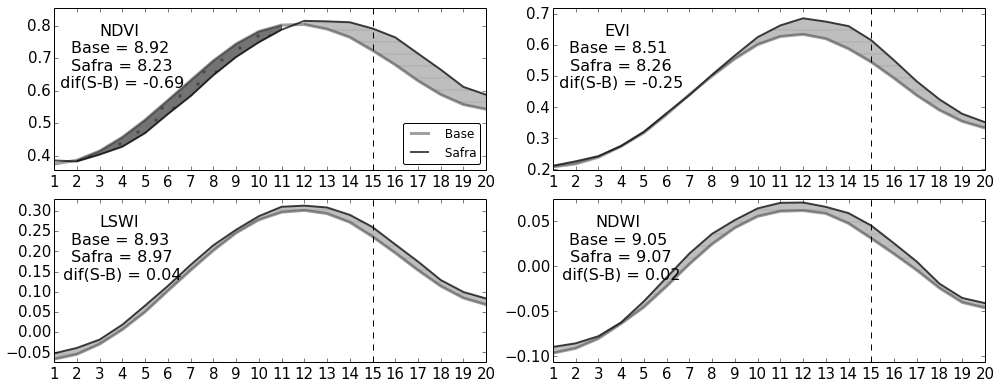

In [3]:
%pylab inline
banco = 'dados/banco_diss.h5'
out = '/home/denis/SPIDEROAK/dissertation/Figures/'
comparaplot(2006,'OP_Toledo',out,save=False,full=False)

In [ ]:
Smtsevera = [(2004,'NCP_Ivaipora'),(2005,'OP_Toledo'),(2006,'NCP_Porecatu'),
             (2010,'NP_Assai'),(2010,'NCP_Londrina'),(2010,'NCP_Porecatu')]
Ssevera = [(2004,'NCP_Porecatu'),(2005,'COCP_Goioere'),
           (2005,'NCP_Londrina'),(2005,'NCP_Porecatu'),(2006,'NP_Assai'),
           (2006,'NP_CornelioP'),(2006,'NCP_Ivaipora'),(2006,'NCP_Londrina'),
           (2007,'COCP_Goioere'),(2008,'COCP_Goioere'),(2010,'NCP_Apucarana'),
           (2010,'OP_Cascavel'),(2010,'NCP_Faxinal'),(2010,'OP_Foz'),
           (2010,'NCP_Ivaipora')]
mtchuva = [(2002,'NCP_Porecatu'),(2007,'NCP_Londrina'),(2007,'NP_Assai'),
           (2007,'NCP_Porecatu'),(2007,'NP_CornelioP'),(2008,'NCP_Florai'),
           (2008,'NCP_Maringa'),(2008,'NCP_Porecatu'),(2008,'NP_CornelioP'),
           (2012,'NCP_Porecatu'),(2009,'NCP_Porecatu'),(2009,'NP_CornelioP')]#mais que 3

In [ ]:
import numpy as np
micros = ['COCP_CampoM', 'COCP_Goioere', 'NCP_Apucarana', 'NCP_Faxinal',
          'NCP_Florai','NCP_Ivaipora', 'NCP_Londrina', 'NCP_Maringa', 'NCP_Porecatu',
          'NP_Assai', 'NP_CornelioP','OP_Cascavel', 'OP_Foz', 'OP_Toledo']
anos = [i for i in np.arange(2002,2013,1)]#2013